In [33]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import joblib

Salary

In [ ]:
salary_data = pd.read_csv("salary_data.csv")

salary_data_X = np.array(salary_data["YearsExperience"])
salary_data_X = salary_data_X.reshape(-1, 1)

salary_data_y = np.array(salary_data["Salary"])

degree = 3
salary_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) 
salary_model.fit(salary_data_X, salary_data_y)
salary_model.score(salary_data_X, salary_data_y)

0.9635969766249464

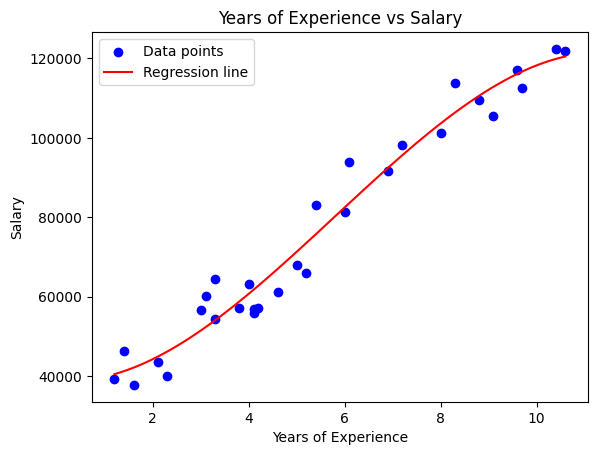

In [3]:
salary_X_line = np.linspace(salary_data_X.min(), salary_data_X.max(), 100).reshape(-1, 1)
salary_y_line = salary_model.predict(salary_X_line)

plt.scatter(salary_data_X, salary_data_y, color="blue", label="Data points")
plt.plot(salary_X_line, salary_y_line, color="red", label="Regression line")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary")
plt.legend()
plt.show()

Income

In [19]:
income_dataset = pd.read_csv("income_dataset.csv")

income_dataset_X = np.column_stack((income_dataset["age"], income_dataset["experience"]))
income_dataset_y = np.array(income_dataset["income"])

degree = 3
income_dataset_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # Polynomial Regression model
income_dataset_model.fit(income_dataset_X, income_dataset_y)
income_dataset_model.score(income_dataset_X, income_dataset_y)

0.9928348273489257

In [24]:
# Create a grid for regression plane
x_surf, y_surf = np.meshgrid(
    np.linspace(min(income_dataset["experience"]), max(income_dataset["experience"]), 50),
    np.linspace(min(income_dataset["age"]), max(income_dataset["age"]), 50)
)
z_surf = income_dataset_model.predict(
    np.column_stack((y_surf.ravel(), x_surf.ravel()))
).reshape(x_surf.shape)

# Plot regression plane
surface = go.Surface(
    x=x_surf, y=y_surf, z=z_surf,
    colorscale="Reds", opacity=0.5
)

# Scatter data
scatter = go.Scatter3d(
    x=income_dataset["experience"],
    y=income_dataset["age"],
    z=income_dataset["income"],
    mode="markers",
    marker=dict(size=5, color="blue")
)

fig = go.Figure(data=[surface, scatter])
fig.update_layout(
    scene=dict(
        xaxis_title="Experience",
        yaxis_title="Age",
        zaxis_title="Income"
    ),
    title="Polynomial Regression"
)

fig.show()

Advertising

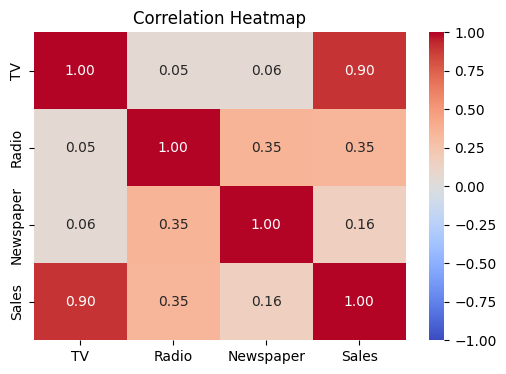

In [17]:
advertising_dataset = pd.read_csv("advertising-dataset.csv")
corr = advertising_dataset.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
advertising_dataset_X = np.column_stack((advertising_dataset["TV"], advertising_dataset["Radio"]))
advertising_dataset_y = np.array(advertising_dataset["Sales"])

degree = 3
advertising_dataset_model = make_pipeline(PolynomialFeatures(degree), LinearRegression()) # Polynomial Regression model
advertising_dataset_model.fit(advertising_dataset_X, advertising_dataset_y)
advertising_dataset_model.score(advertising_dataset_X, advertising_dataset_y)

0.9391348291657764

In [32]:
x_surf, y_surf = np.meshgrid(
    np.linspace(min(advertising_dataset["TV"]), max(advertising_dataset["TV"]), 50),
    np.linspace(min(advertising_dataset["Radio"]), max(advertising_dataset["Radio"]), 50)
)
z_surf = advertising_dataset_model.predict(
    np.column_stack((x_surf.ravel(), y_surf.ravel()))
).reshape(x_surf.shape)

# Plot regression plane
surface = go.Surface(
    x=x_surf, y=y_surf, z=z_surf,
    colorscale="Reds", opacity=0.5
)

# Scatter data
scatter = go.Scatter3d(
    x=advertising_dataset["TV"],
    y=advertising_dataset["Radio"],
    z=advertising_dataset["Sales"],
    mode="markers",
    marker=dict(size=5, color="blue")
)

fig = go.Figure(data=[surface, scatter])
fig.update_layout(
    scene=dict(
        xaxis_title="TV",
        yaxis_title="Radio",
        zaxis_title="Sales"
    ),
    title="Polynomial Regression"
)

fig.show()

In [35]:
joblib.dump(salary_model, "salary_model.pkl")
joblib.dump(income_dataset_model, "income_model.pkl")
joblib.dump(advertising_dataset_model, "advertising_model.pkl")

['advertising_model.pkl']